# Hedonism Survey

## Abstract

This notebook cleans and explores a dataset that was gathered through a survey. The survey was sent out to students in the American University of Armenia, with the goal of understanding the distribution of hedonistic traits in peoples amongst the age group 17-23.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleaning

In [2]:
hedonism_survey = pd.read_csv("../input/hedonism-survey-data/Hedonism survey.csv")
hedonism_survey[hedonism_survey.columns[1]]

0     English
1     English
2     English
3     English
4     English
       ...   
65    English
66    English
67    Русский
68    English
69    Հայերեն
Name: Language / Язык / Լեզու, Length: 70, dtype: object

In [3]:
hedonism_survey.head()

,Timestamp,Language / Язык / Լեզու,Նշեք Ձեր սեռը,Նշեք Ձեր տարիքային խումբը,Նշեք Ձեր հետաքրքրության ոլորտը,Որտեղ եք մեծացել,"Խոհանոցում ունեմ 12 սննդամթերք, որոնք կարող եմ անհատապես ուտել, բայց կարող եմ նաև 2-3 ժամ անցկացնել դրանցից համեղ ուտեստ պատրաստելու համար: Անհատապես կսպառե՞մ բաղադրիչները, թե՞ կորոշեմ ինձ շատ համեղ ուտեստով հյուրասիրել:",Վերջին 2 տարվա ընթացքում քանի տեղ եք ճանապարհորդել։,"Եթե ​​գումար ունենայի, վերջին երկու տարվա ընթացքում քանի՞ տեղ կճանապարհորդեի:",Ես վարում եմ ակտիվ սեռական կյանք,...,I would rather be sexually active:,"If I were given $ 3,000, I would:(you have no debts due)","You were offered two jobs, a job in Armenia, and a job elsewhere. Would you rather be away from your family and your homeland, to enjoy your life in a country elsewhere, or would you take the job in Armenia and be close to your family and friends. (both jobs will let you afford the same things)","If my partner was okay with premarital sex, I would go along as well.","I sometimes buy gifts for myself, I do not hesitate to spend money on myself.","If my partner was not okay with premarital sex, I would wait until marriage too.",I prefer delicious food over healthy food (according to the last 3 meals),I tend to make impulsive decisions based on the wishes I have at the exact moment.,I would rather have a:,I would rather have a partner who:
0,2021/03/31 11:15:30 PM GMT+4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Both,Put it in a savings account,I would take the job elsewhere,True,Once in a while,True,True,No,Really intelligent partner,Values tradition greatly and conforms to the s...
1,2021/03/31 11:24:44 PM GMT+4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Both,"Go shopping, buy things for me and my close ones",I would take the job elsewhere,True,Once in a while,True,True,Yes,Really intelligent partner,Values pleasure greatly and is open to ideas o...
2,2021/03/31 11:29:18 PM GMT+4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,After marriage,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,False,Very true,True,True,No,Really intelligent partner,Values pleasure greatly and is open to ideas o...
3,2021/03/31 11:30:07 PM GMT+4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Both,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,True,Once in a while,True,False,No,Really good looking partner,Values pleasure greatly and is open to ideas o...
4,2021/03/31 11:31:00 PM GMT+4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,After marriage,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,False,True,True,True,Yes,Really intelligent partner,Values tradition greatly and conforms to the s...


In [4]:
hedonism_survey[hedonism_survey.columns[1]].value_counts()

English    43
Հայերեն    21
Русский     6
Name: Language / Язык / Լեզու, dtype: int64

In [5]:
df = pd.DataFrame()
col_names = ["sex", "age", "interest", "residence", "dish", "travel_s", "travel_d", "sex_active_s", \
             "premarital_sex", "sex_active_d", "money", "job", "premarital_partner_ok", "gifts", \
             "premarital_partner_nok", "healthy", "impulsive", "looks", "partner_trad"]

df["lang"] = hedonism_survey.iloc[:,1]


for i, col in enumerate(col_names):
    df[col] = hedonism_survey.iloc[:,i + 2].fillna(hedonism_survey.iloc[:,i + 2 + 19].fillna(hedonism_survey.iloc[:,i + 2 + 19 + 19]))

df

,lang,sex,age,interest,residence,dish,travel_s,travel_d,sex_active_s,premarital_sex,sex_active_d,money,job,premarital_partner_ok,gifts,premarital_partner_nok,healthy,impulsive,looks,partner_trad
0,English,Male,17 - 23,Mix of natural and social sciences,"Large city (500,000+)",Consume the ingredients individually.,0,3,False,It is okay,Both,Put it in a savings account,I would take the job elsewhere,True,Once in a while,True,True,No,Really intelligent partner,Values tradition greatly and conforms to the s...
1,English,Female,17 - 23,Mix of arts and sciences,"Large city (500,000+)",Consume the ingredients individually.,1,10,False,It is okay,Both,"Go shopping, buy things for me and my close ones",I would take the job elsewhere,True,Once in a while,True,True,Yes,Really intelligent partner,Values pleasure greatly and is open to ideas o...
2,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,2,10,False,It is not okay,After marriage,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,False,Very true,True,True,No,Really intelligent partner,Values pleasure greatly and is open to ideas o...
3,English,Female,17 - 23,Social sciences,"Large city (500,000+)",Tasty dish,2,4,False,It is okay,Both,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,True,Once in a while,True,False,No,Really good looking partner,Values pleasure greatly and is open to ideas o...
4,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,0,more than 5,False,It is not okay,After marriage,"Go shopping, buy things for me and my close ones",I would take the job in Armenia,False,True,True,True,Yes,Really intelligent partner,Values tradition greatly and conforms to the s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,English,Female,17 - 23,Mix of natural and social sciences,"Large city (500,000+)",Tasty dish,3,4-5,False,It is not okay,After marriage,Put it in a savings account,I would take the job in Armenia,False,Once in a while,True,True,No,Really intelligent partner,Values tradition greatly and conforms to the s...
66,English,Female,17 - 23,Arts,"Large city (500,000+)",Consume the ingredients individually.,Considering the situation of last year's trave...,"Of course many, I love traveling",False,It is okay,Both,Put it in a savings account,I would take the job elsewhere,True,Very true,True,True,Yes,Really intelligent partner,Values pleasure greatly and is open to ideas o...
67,Русский,Мужской,17 - 23,Социальные науки,"Большой город (500,000+)",Приготовлю вкусное блюдо,4,США,Правда,Это нормально,Оба варианта,Отложил(а) их на сберегательный счёт,Я бы согласился(ась) на работу в другой стране,Правда,Очень верно,Правда,Правда,Правда,Очень умён,"Ценит удовольствие и открыт для идей, вне обще..."
68,English,Female,17 - 23,Mix of natural and social sciences,"Large city (500,000+)",Tasty dish,Maybe 5-10 in Armenia,10-15 abroad,False,It is okay,Both,"Go shopping, buy things for me and my close ones",I would take the job elsewhere,True,True,True,True,Yes,Really intelligent partner,Values tradition greatly and conforms to the s...


In [6]:
df.sex.replace(["Мужской", "Արական"], "Male", inplace=True)
df.sex.replace(["Женский", "Իգական"], "Female", inplace=True)
df.sex.value_counts()

Female    52
Male      18
Name: sex, dtype: int64

In [7]:
df.age.value_counts()

17 - 23    68
36 - 49     2
Name: age, dtype: int64

In [8]:
df.interest.replace(["Եվ գիտություններ և արվեստ", "Смесь искусств и наук"], "Mix of arts and sciences", inplace=True)
df.interest.replace(["Եվ հասարակական, և բնական գիտություններ", "Смесь естественных и социальных наук"], "Mix of natural and social sciences", inplace=True)
df.interest.replace(["Социальные науки", "Հասարակական գիտություններ"], "Social sciences", inplace=True)
df.interest.replace(["Արվեստ", "Искусство"], "Arts", inplace=True)
df.interest.replace(["Բնական գիտություններ", "Естественные науки"], "Natural sciences", inplace=True)
df.interest.value_counts()

Mix of natural and social sciences    22
Mix of arts and sciences              17
Social sciences                       16
Arts                                   9
Natural sciences                       6
Name: interest, dtype: int64

In [9]:
df.residence.replace(["Մեծ քաղաք (500,000+)", "Large city (500,000+)", "Большой город (500,000+)"], "Large city", inplace=True)
df.residence.replace(["Փոքր քաղաք", "Маленький город"], "Small city", inplace=True)
df.residence.replace(["Գյուղական տարածք", "Сельская местность"], "Rural area", inplace=True)
df.residence.value_counts()

Large city    44
Small city    25
Rural area     1
Name: residence, dtype: int64

In [10]:
df.dish.replace(["Համեղ ուտեստ", "Приготовлю вкусное блюдо"], "Tasty dish", inplace=True)
df.dish.replace(["Սննդամթերքները կսպառեմ անհատապես", "Съем ингредиенты раздельно", "Consume the ingredients individually."], "Ingredients", inplace=True)
df.dish.value_counts()

Tasty dish     45
Ingredients    25
Name: dish, dtype: int64

In [11]:
df.travel_s = df.travel_s.str.strip()
df.travel_s.replace(["I haven’t traveled.", "ոչ մի տեղ", "No where", "nowhere outside of Armenia", "outside of the country 0"], "0", inplace=True)
df.travel_s.replace(["One.", "Մեկ տեղ"], "1", inplace=True)
df.travel_s.replace(["2 countries", "I have traveled to 2 countries.", "Because of pandemic, I have traveled to various regions of Armenia only ; Lori, Vayots Dzor etc."], "2", inplace=True)
df.travel_s.replace(["2-3 страны и много путешествий внутри родины", "1 -3", "2-3"], "3", inplace=True)
df.travel_s.replace(["3-4"], "4", inplace=True)
df.travel_s.replace(["2 countries, 5 cities"], "5", inplace=True)
df.travel_s.replace(["5+(in county)"], "6", inplace=True)
df.travel_s.replace(["5/10", "Maybe 5-10 in Armenia"], "7", inplace=True)
df.travel_s.replace(["If you mean how many places you have traveled IDK, but I have traveled probably 8 places."], "8", inplace=True)
df.travel_s.replace(["Considering the situation of last year's traveling was minimum, I can say it was, but mainly in Armenia, I visited different ancient places of Armenia 2,3 times per month."], "60", inplace=True)
df.travel_s.value_counts()

2      16
0      15
3      13
1      12
4       5
8       2
6       2
7       2
60      1
100     1
5       1
Name: travel_s, dtype: int64

In [12]:
df.travel_d = df.travel_d.str.strip()
df.travel_d.replace(["more than 5", "100", "50", "As many as possible", "As much as possible", \
                     "Ինչքան հնարավոր է շատ, ամենաքիչը 4-5", "As much as possible", \
                    "As much as I can, many.", "30+", "99999999", "1000000", "190", \
                    "and if there was not Covid 😂 a looooot", "The hole world", "More, maybe 15", \
                    "I would travel as much as my weekly and monthly holidays allow me to", \
                     "Of course many, I love traveling", "Many"], "20", inplace=True)
df.travel_d.replace(["I would like to go to 3-4 countries.", \
                     "As many as I could, probabaly twice a year to different places", "4 or more", "4."], "4", inplace=True)
df.travel_d.replace(["4-5 стран", "4-5"], "5", inplace=True)
df.travel_d.replace(["~10", "10 or  more"], "10", inplace=True)
df.travel_d.replace(["I would never come back tbh"], "1", inplace=True)
df.travel_d.replace(["I couldn’t travel( coronaaa😷)", "It is not about money but the age restrictions.", \
                     "I did not have the opportunity to travel. I was serving in the Army within the last 2 years.p"], "0", inplace=True)
df.travel_d.replace(["2՝ Ֆրանսիա, Իտալիա", "Would stay longer"], "2", inplace=True)
df.travel_d.replace(["Շատ տեղ չէի գնա, բայց երկար կմնաի"], "Would stay longer", inplace=True)
df.travel_d.replace(["Մեկ տեղ", "США"], "1", inplace=True)
df.travel_d.replace(["10-15 abroad"], "13", inplace=True)
df.travel_d.replace(["Would stay longer"], "2", inplace=True)

df.travel_d.value_counts()

20    18
3     10
4     10
10     7
2      5
1      5
5      5
0      4
6      2
7      2
13     1
15     1
Name: travel_d, dtype: int64

In [13]:
df.sex_active_s.replace(["Սխալ է", "Ложь", "False"], False, inplace=True)
df.sex_active_s.replace(["Ճիշտ է", "Правда", "True"], True, inplace=True)
df.sex_active_s.value_counts()

False    56
True     14
Name: sex_active_s, dtype: int64

In [14]:
df.premarital_sex.replace(["Դա նորմալ է", "Это нормально", "It is okay"], "Okay", inplace=True)
df.premarital_sex.replace(["Դա նորմալ չէ", "Это ненормально", "It is not okay"], "Not Okay", inplace=True)
df.premarital_sex.value_counts()

Okay        44
Not Okay    26
Name: premarital_sex, dtype: int64

In [15]:
df.sex_active_d.replace(["Երկուսն էլ", "Оба варианта"], "Both", inplace=True)
df.sex_active_d.replace(["Ոչ մեկը", "Ни один из вариантов"], "Neither", inplace=True)
df.sex_active_d.replace(["Մինչ ամուսնությունը", "До брака"], "Before marriage", inplace=True)
df.sex_active_d.replace(["Ամուսնությունից հետո", "После брака"], "After marriage", inplace=True)
df.sex_active_d.value_counts()

After marriage     35
Both               27
Neither             4
Before marriage     4
Name: sex_active_d, dtype: int64

In [16]:
df.money.replace(["Ես կխնայի", "Put it in a savings account", "Отложил(а) их на сберегательный счёт"], "Save", inplace=True)
df.money.replace(["Go shopping, buy things for me and my close ones", "Կգնայի գնումների, կգնեի իրեր իմ ու մտերիմներիս համար", \
                         "Отправился(ась) за покупками, купил(а) бы что-то себе и близким"], "Spend", inplace=True)
df.money.value_counts()

Save     44
Spend    26
Name: money, dtype: int64

In [17]:
df.job.replace(["I would take the job in Armenia", "Ես կաշխատեի Հայաստանում", "Я бы согласился(ась) на работу в Армении"], "Armenia", inplace=True)
df.job.replace(["I would take the job elsewhere", "Ես կաշխատեի այլ երկրում", "Я бы согласился(ась) на работу в другой стране"], "Elsewhere", inplace=True)
df.job.value_counts()

Armenia      40
Elsewhere    30
Name: job, dtype: int64

In [18]:
df.premarital_partner_ok.replace(["Ճիշտ է", "Правда", "True"], True, inplace=True)
df.premarital_partner_ok.replace(["Սխալ է", "Ложь", "False"], False, inplace=True)
df.premarital_partner_ok.value_counts()

False    37
True     33
Name: premarital_partner_ok, dtype: int64

In [19]:
df.gifts.replace(["Շատ ճիշտ է", "Very true", "Очень верно"], "Very True", inplace=True)
df.gifts.replace(["Ճիշտ է", "Верно"], "True", inplace=True)
df.gifts.replace(["Մեկ-մեկ", "Иногда", "Once in a while", "Иногда"], "Sometimes", inplace=True)
df.gifts.replace(["Սխալ է", "Ложь"], "False", inplace=True)
df.gifts.value_counts()

Sometimes    32
Very True    18
True         17
False         3
Name: gifts, dtype: int64

In [20]:
df.premarital_partner_nok.replace(["Ճիշտ է", "Правда", "True"], True, inplace=True)
df.premarital_partner_nok.replace(["Սխալ է", "Ложь", "False"], False, inplace=True)
df.premarital_partner_nok.value_counts()

True     57
False    13
Name: premarital_partner_nok, dtype: int64

In [21]:
df.healthy.replace(["Ճիշտ է", "Правда", "True"], True, inplace=True)
df.healthy.replace(["Սխալ է", "Ложь", "False"], False, inplace=True)
df.healthy.value_counts()

True     56
False    14
Name: healthy, dtype: int64

In [22]:
df.impulsive.replace(["Yes", "Правда", "Այո"], True, inplace=True)
df.impulsive.replace(["Ոչ", "Ложь", "No"], False, inplace=True)
df.impulsive.value_counts()

True     36
False    34
Name: impulsive, dtype: int64

In [23]:
df.looks.replace(["Really intelligent partner", "Очень умён", "Ունենալ խելացի զուգընկեր"], "Smart", inplace=True)
df.looks.replace(["Really good looking partner", "Ունենալ գեղեցիկ զուգընկեր", "No"], "Beautiful", inplace=True)
df.looks.value_counts()

Smart        55
Beautiful    15
Name: looks, dtype: int64

In [24]:
df.partner_trad.replace(["Values tradition greatly and conforms to the social scripts.", \
                         "Ценит традиции и соответствует общественным требованиям", \
                         "Գնահատում է ավանդույթները և համապատասխանում է հանրային պահանջներին:"], True, inplace=True)
df.partner_trad.replace(["Values pleasure greatly and is open to ideas outside of social scripts.", \
                         "Ценит удовольствие и открыт для идей, вне общественных требований", \
                         "Գնահատում է հաճույքը և բաց է նոր գաղափարների համար, որոնք դուրս են հանրային պահանջներից:"], False, inplace=True)
df.partner_trad.value_counts()

False    48
True     22
Name: partner_trad, dtype: int64

In [25]:
df

,lang,sex,age,interest,residence,dish,travel_s,travel_d,sex_active_s,premarital_sex,sex_active_d,money,job,premarital_partner_ok,gifts,premarital_partner_nok,healthy,impulsive,looks,partner_trad
0,English,Male,17 - 23,Mix of natural and social sciences,Large city,Ingredients,0,3,False,Okay,Both,Save,Elsewhere,True,Sometimes,True,True,False,Smart,True
1,English,Female,17 - 23,Mix of arts and sciences,Large city,Ingredients,1,10,False,Okay,Both,Spend,Elsewhere,True,Sometimes,True,True,True,Smart,False
2,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,2,10,False,Not Okay,After marriage,Spend,Armenia,False,Very True,True,True,False,Smart,False
3,English,Female,17 - 23,Social sciences,Large city,Tasty dish,2,4,False,Okay,Both,Spend,Armenia,True,Sometimes,True,False,False,Beautiful,False
4,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,0,20,False,Not Okay,After marriage,Spend,Armenia,False,True,True,True,True,Smart,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,3,5,False,Not Okay,After marriage,Save,Armenia,False,Sometimes,True,True,False,Smart,True
66,English,Female,17 - 23,Arts,Large city,Ingredients,60,20,False,Okay,Both,Save,Elsewhere,True,Very True,True,True,True,Smart,False
67,Русский,Male,17 - 23,Social sciences,Large city,Tasty dish,4,1,True,Okay,Both,Save,Elsewhere,True,Very True,True,True,True,Smart,False
68,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,7,13,False,Okay,Both,Spend,Elsewhere,True,True,True,True,True,Smart,True


In [26]:
df.travel_s = pd.to_numeric(df.travel_s)
df.travel_d = pd.to_numeric(df.travel_d)

## Data Analysis

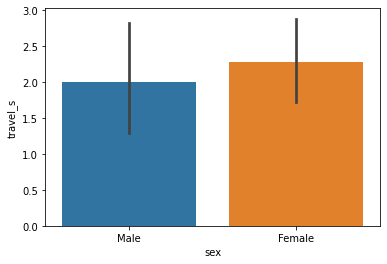

In [27]:
sns.barplot(data=df[df.travel_s < 22], x="sex", y="travel_s")
plt.show()

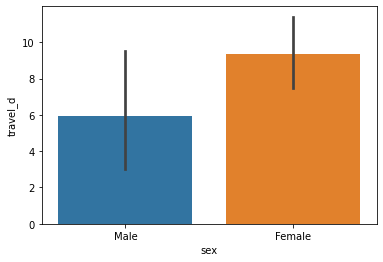

In [28]:
sns.barplot(data=df[df.travel_d < 22], x="sex", y="travel_d")
plt.show()

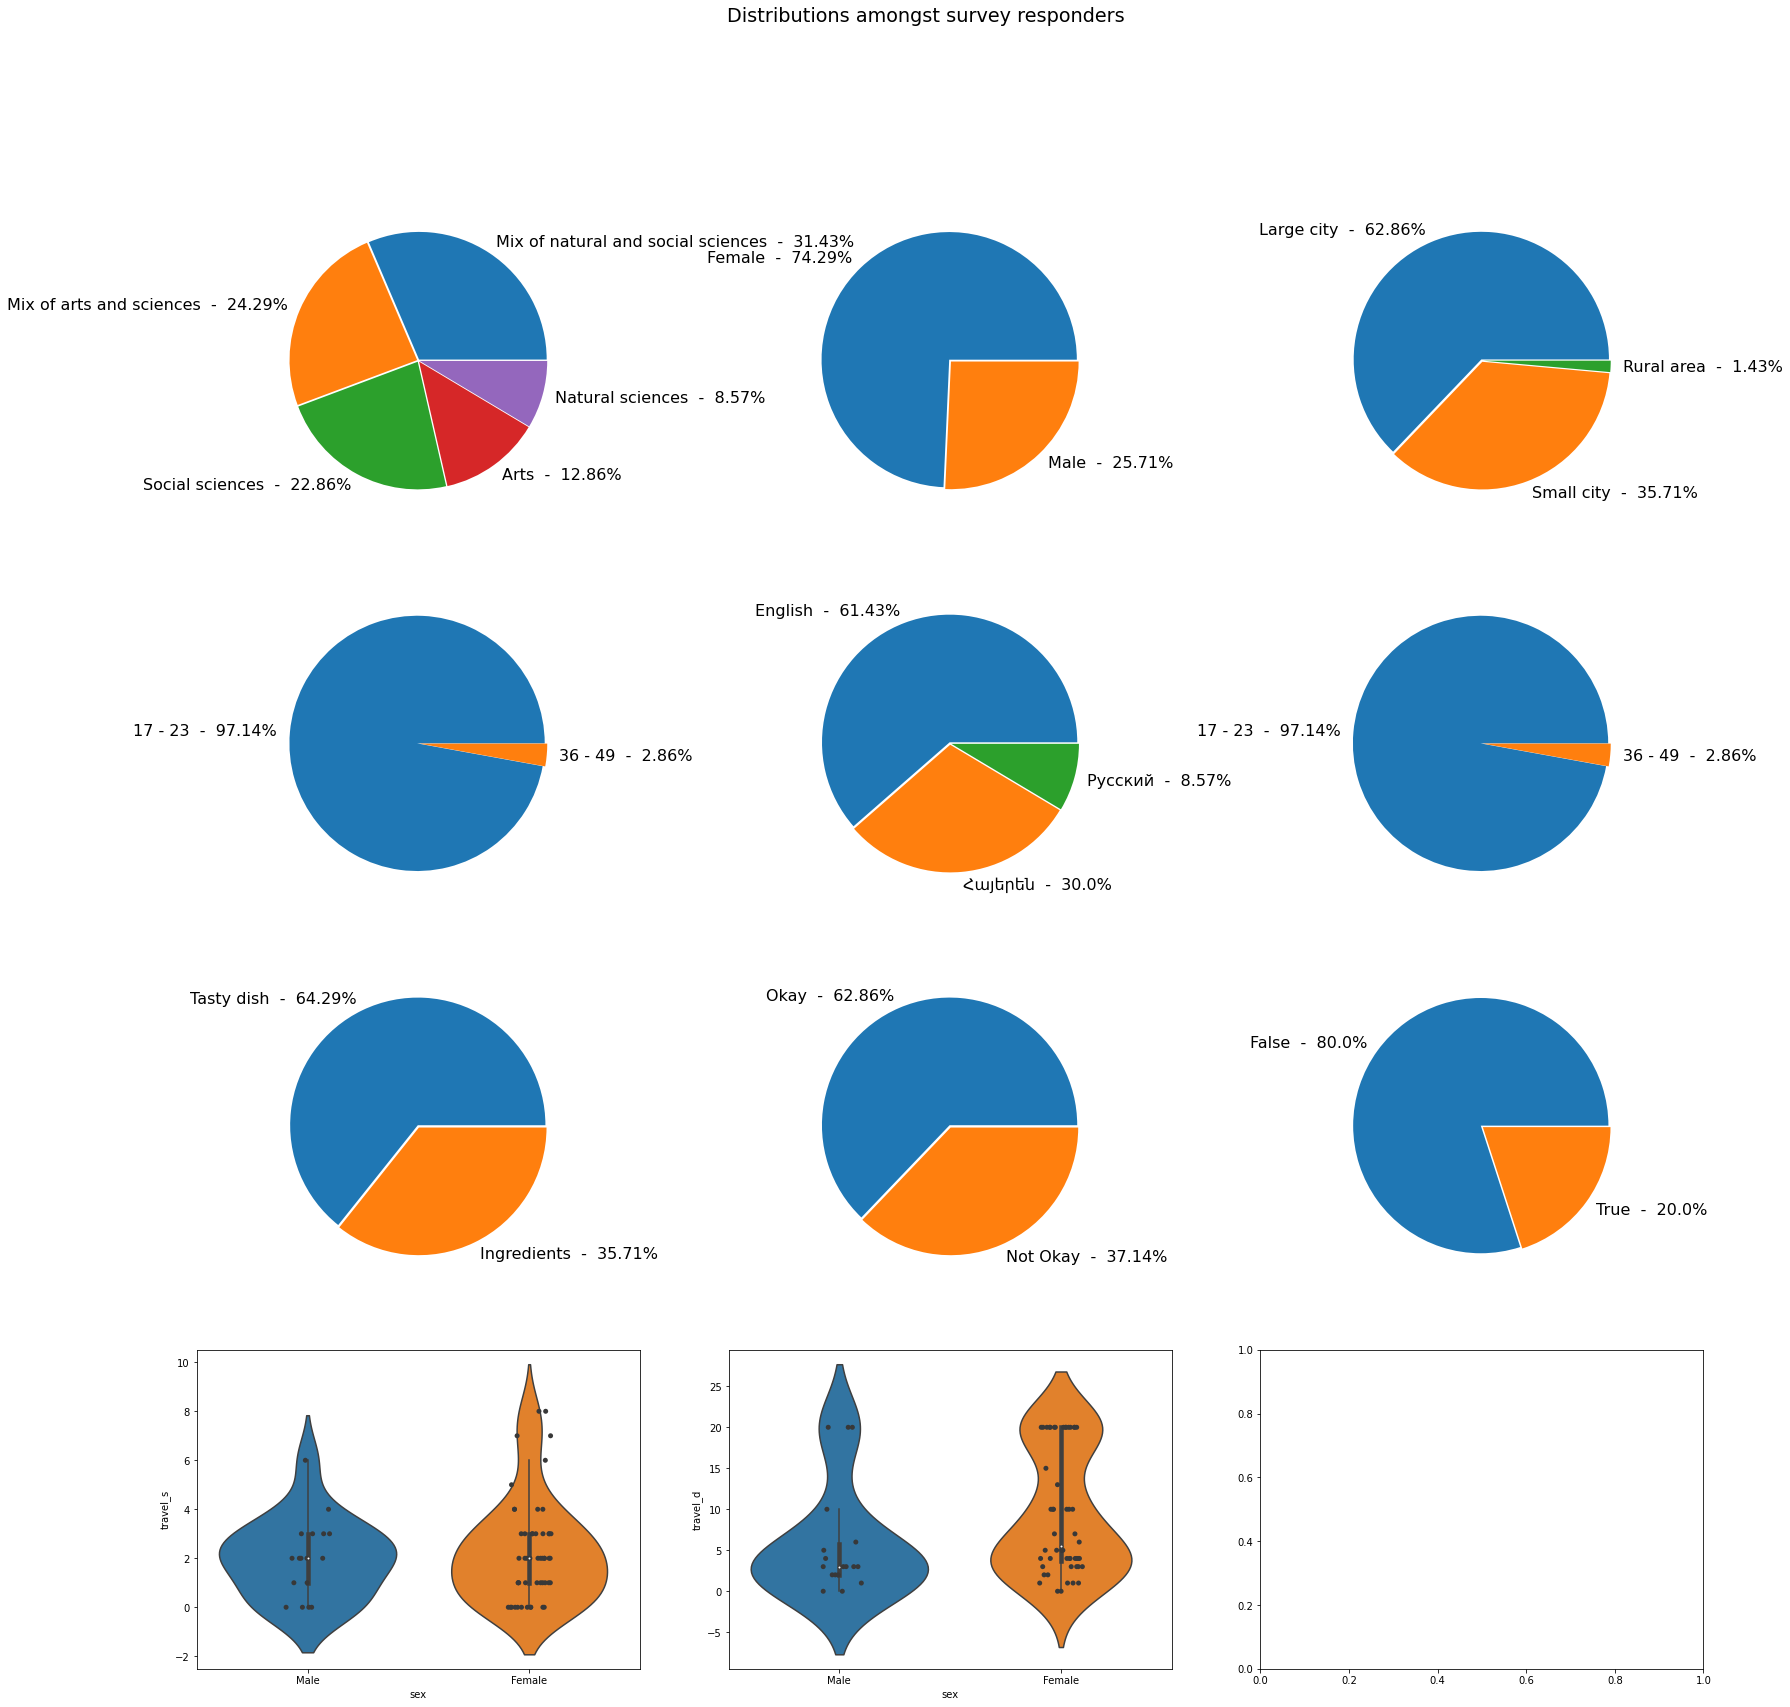

In [29]:
fig, ax = plt.subplots(nrows= 4, ncols = 3, figsize=[27,27])
fig.set(facecolor = "white")
plt.rcParams["font.family"] = "Sylfaen"
plt.rcParams["font.size"] = "16"
columns = ["interest", "sex", "residence", \
          "age", "lang", "age", \
          "dish", "premarital_sex", "sex_active_s"]
num_cols = ["travel_s", "travel_d"]

fig.suptitle("Distributions amongst survey responders")

counter = 0
for row in range(3):
    for col in range(3):
        col_name = columns[counter]
        ax[row, col].pie(x = df[col_name].value_counts(), labels=df[col_name].value_counts().keys().astype(str) + "  -  " + (df[col_name].value_counts() / df[col_name].count() * 100).round(2).astype(str) + "%", explode=[0.01]*df[col_name].value_counts().count())
        counter += 1

for col in range(2):
    sns.stripplot(data=df[df[num_cols[col]] < 22], x = "sex", y=num_cols[col], ax=ax[3, col], color="#383838")
    sns.violinplot(data=df[df[num_cols[col]] < 22], x = "sex", y=num_cols[col], ax=ax[3, col])

plt.show()

In [30]:
df.travel_d.value_counts()

20    18
3     10
4     10
10     7
1      5
2      5
5      5
0      4
6      2
7      2
13     1
15     1
Name: travel_d, dtype: int64

### Calculating hedonism score

Dish (stimulation):
- -3 Ingredients
- +3 Tasty dish

Travel (hedonism):
- make max 20
- (travel_s + travel_d / 3) floored

Sexually active supply: (hedonism vs trad.)
- -4 False
- +5 True

Sexually active demand: (hedonism vs trad.)
- -6 False
- +5 True

Premarital sex okay: (hedonism vs trad.)
- -6 Not Okay
- +4 Okay

Money: (stimulation vs security)
- +2 Spend
- -3 Save

Job: (hedonism, stimulation vs conformity, security)
- -3 Armenia
- +3 Elsewhere

Premarital partner okay: (hedonism vs trad.)
- +4 True
- -8 False

Premarital partner not okay: (hedonism vs conformity)
- -8 True
- +8 False

Premarital partner go along: (hedonism vs conformity) (
- -13 True
- +3 False

Gifts (stimulation vs security)
- +5 Very true
- +2 True
- 0 Sometimes
- -3 False

Healthy food (stimulation vs security):
- -1 True
- +1 False

Impulsive (stimulation):
- +1 True
- -1 False

Looks (stimulation vs security):
- -1 Smart
- +4 Beautiful

Partner trad:
- -5 True
- +5 False

In [31]:
def hedon_score(row):
    import math
    score = (3 if row.dish == "Tasty dish" else -3) +\
    math.floor((min(20, row.travel_s) + min(20, row.travel_d))/2) +\
    (5 if row.sex_active_s else -4) +\
    (5 if row.sex_active_d else -6) +\
    (4 if row.premarital_sex == "Okay" else -6) +\
    (2 if row.money == "Spend" else -3) +\
    (3 if row.job == "Elsewhere" else -3) +\
    (4 if row.premarital_partner_ok else -8) +\
    (-8 if row.premarital_partner_nok else 8) +\
    (-13 if row.premarital_partner_ok and row.premarital_partner_nok else 2) +\
    (5 if row.gifts == "Very true" else (2 if row.gifts == "True" else (0 if row.gifts == "Sometimes" else -3))) +\
    (-1 if row.healthy else 1) +\
    (-1 if row.looks == "Smart" else 4) +\
    (-5 if row.partner_trad else 5)
    
    return score

df["hedonism"] = df.apply(hedon_score, axis=1)

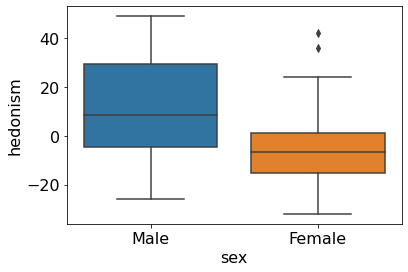

In [32]:
sns.boxplot(data = df, x="sex", y="hedonism")
plt.savefig("./sx_hedon.png")

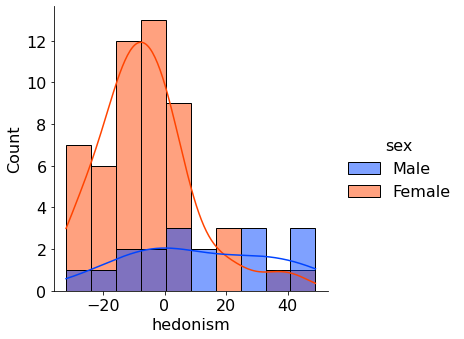

In [33]:
sns.displot(df, x = "hedonism", hue="sex", kde=True, palette=["#0044FF", "#FF4400"])
plt.savefig("./sx_hedon2.png")

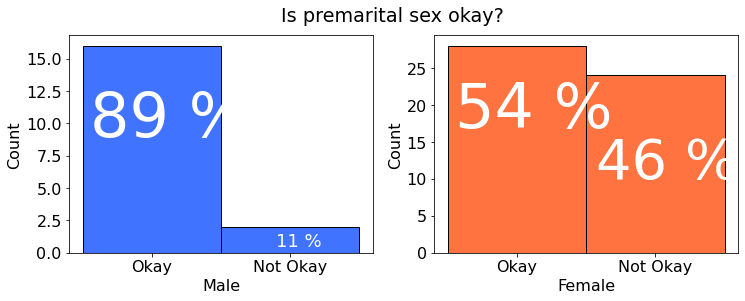

In [34]:
fig, ax = plt.subplots(figsize=[12, 4], nrows=1, ncols=2)
sns.histplot(df[df.sex == "Male"].premarital_sex, ax=ax[0], color="#0044FF")
sns.histplot(df[df.sex == "Female"].premarital_sex, ax=ax[1], color="#FF4400")
ax[0].set_xlabel("Male")
ax[1].set_xlabel("Female")
fig.suptitle("Is premarital sex okay?")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax[0].text(-0.45, 9, "89 %")
plt.rcParams["font.size"] = 18
ax[0].text(0.9, 0.5, "11 %")
plt.rcParams["font.size"] = 62
ax[1].text(-0.45, 17, "54 %")
plt.rcParams["font.size"] = 56
ax[1].text(0.57, 10, "46 %")
plt.rcParams["font.size"] = 14
plt.rcParams["text.color"] = "#000000"
plt.savefig("./sx_premokay.png")

In [35]:
dff = df.copy()
dff.premarital_sex.replace("Not Okay", False, inplace=True)
dff.premarital_sex.replace("Okay", True, inplace=True)
dff.groupby(dff.sex).premarital_sex.sum() / dff.groupby(df.sex).premarital_sex.count() * 100

sex
Female    53.846154
Male      88.888889
Name: premarital_sex, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


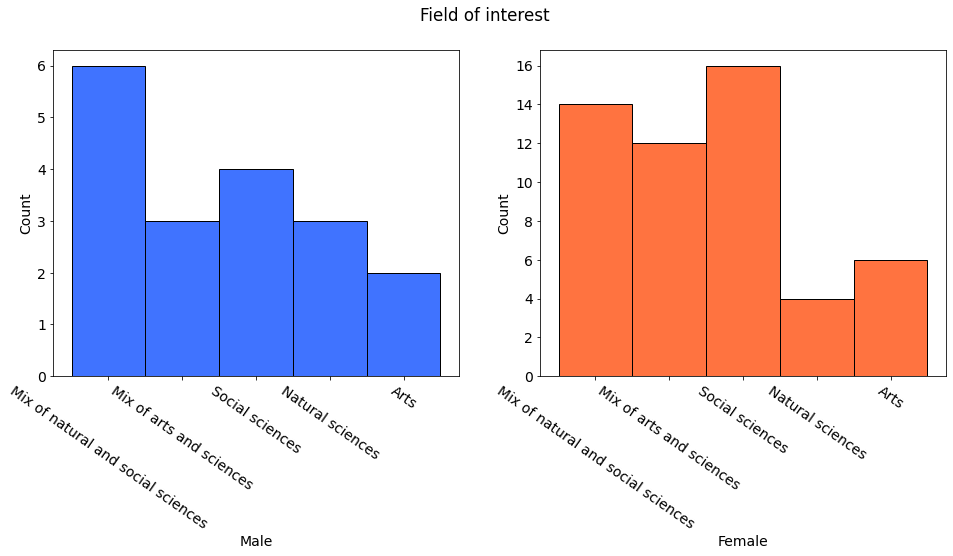

In [36]:
fig, ax = plt.subplots(figsize=[16, 6],nrows=1, ncols=2)
sns.histplot(df[df.sex == "Male"].interest, ax=ax[0], color="#0044FF")
sns.histplot(df[df.sex == "Female"].interest, ax=ax[1], color="#FF4400")
ax[0].set_xlabel("Male")
ax[1].set_xlabel("Female")
ax[0].set_xticklabels(df.interest.unique(), rotation = -35)
ax[1].set_xticklabels(df.interest.unique(), rotation = -35)
fig.suptitle("Field of interest")
plt.savefig("./n_foi.png")

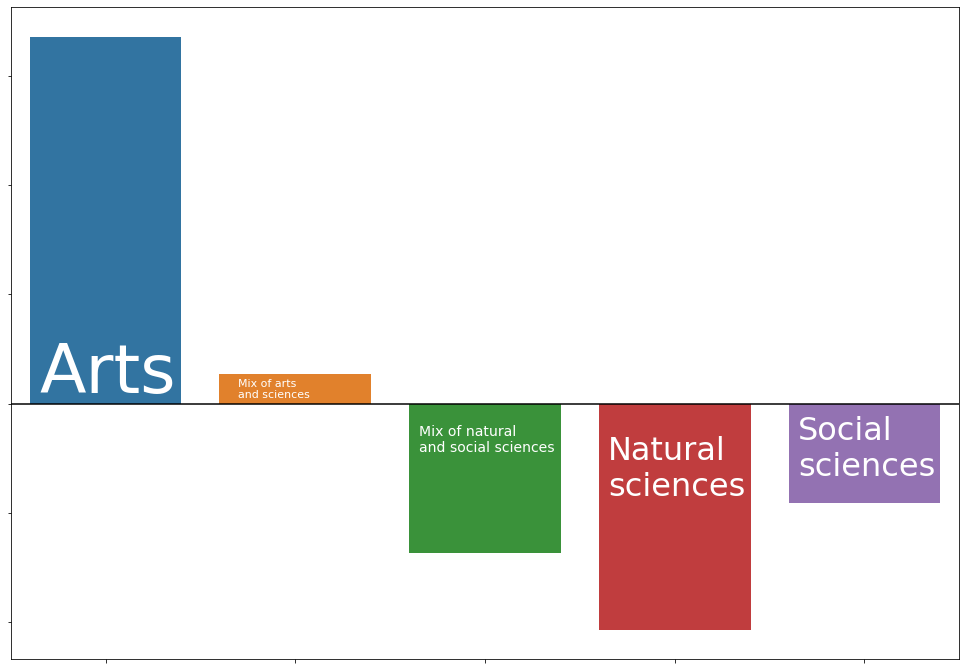

In [37]:
fig, ax = plt.subplots(figsize = (17,12))
ax = sns.barplot(x=df.groupby("interest").hedonism.mean().index, y=df.groupby("interest").hedonism.mean())
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_xlabel("")
ax.set_ylabel("")
plt.rcParams["font.size"] = 68
plt.rcParams["text.color"] = "#FFFFFF"
ax.axhline(color="#000000")
ax.text(-0.35, 0.5, s="Arts")
plt.rcParams["font.size"] = 11
ax.text(0.7, 0.25, s="Mix of arts \nand sciences")
plt.rcParams["font.size"] = 14
ax.text(1.65, -2.2, s="Mix of natural \nand social sciences")
plt.rcParams["font.size"] = 32
ax.text(2.65, -4.2, s="Natural\nsciences")
plt.rcParams["font.size"] = 32
ax.text(3.65, -3.3, s="Social\nsciences")
plt.rcParams["grid.color"] = "#FFFFFF"
plt.savefig("./foi_hedon.png")

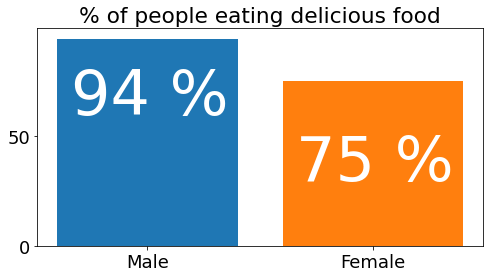

In [38]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((df.groupby(df.sex).healthy.sum() / (df.groupby(df.sex).healthy.count()) * 100)["Male"]))
ax.bar("Female", ((df.groupby(df.sex).healthy.sum() / (df.groupby(df.sex).healthy.count()) * 100)["Female"]))
ax.set_title("% of people eating delicious food")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 60, "94 %")
ax.text(1-0.34, 30, "75 %")
plt.rcParams["font.size"] = 60
plt.rcParams["text.color"] = "#000000"
plt.savefig("./sx_healthy.png")

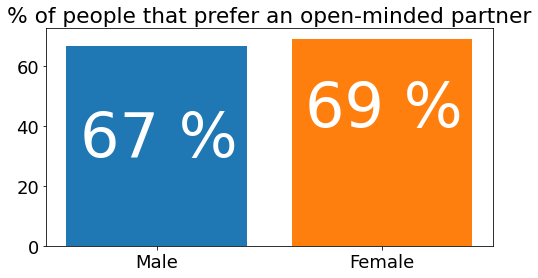

In [39]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((100 - df.groupby(df.sex).partner_trad.sum() / df.groupby(df.sex).partner_trad.count() * 100)["Male"]))
ax.bar("Female", ((100 - (df.groupby(df.sex).partner_trad.sum() / df.groupby(df.sex).partner_trad.count() * 100))["Female"]))
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
ax.set_title("% of people that prefer an open-minded partner")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 30, "67 %")
ax.text(1-0.34, 40, "69 %")
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
plt.savefig("./sx_openminded.png")

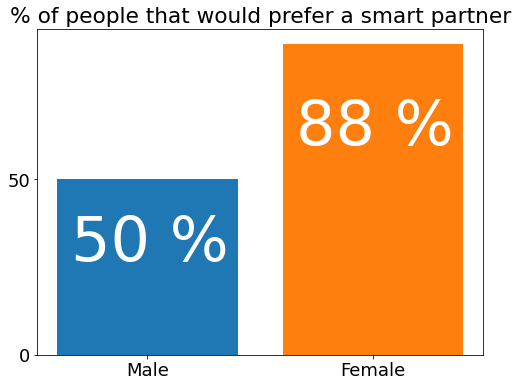

In [40]:
dff = df.copy()
dff.looks.replace("Smart", False, inplace=True)
dff.looks.replace("Beautiful", True, inplace=True)
dff.groupby(dff.sex).looks.sum() / dff.groupby(df.sex).looks.count() * 100

plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar("Male", ((100 - dff.groupby(dff.sex).looks.sum() / dff.groupby(df.sex).looks.count() * 100)["Male"]))
ax.bar("Female", ((100 - (dff.groupby(dff.sex).looks.sum() / dff.groupby(df.sex).looks.count() * 100))["Female"]))
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
ax.set_title("% of people that would prefer a smart partner")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 27, "50 %")
ax.text(1-0.34, 60, "88 %")

plt.savefig("./sx_smart.png")

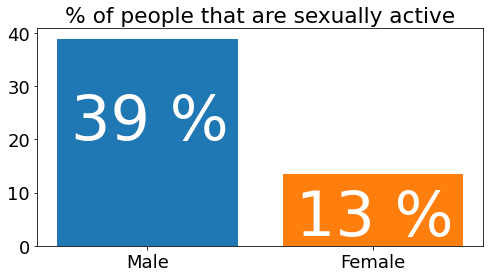

In [41]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
#dff.groupby(dff.sex).sex_active_s.sum() / dff.groupby(df.sex).sex_active_s.count() * 100
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((dff.groupby(dff.sex).sex_active_s.sum() / dff.groupby(df.sex).sex_active_s.count() * 100)["Male"]))
ax.bar("Female", (((dff.groupby(dff.sex).sex_active_s.sum() / dff.groupby(df.sex).sex_active_s.count() * 100))["Female"]))
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
ax.set_title("% of people that are sexually active")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 20, "39 %")
ax.text(1-0.34, 2, "13 %")
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
plt.savefig("./sx_active.png")

In [42]:
df

,lang,sex,age,interest,residence,dish,travel_s,travel_d,sex_active_s,premarital_sex,...,money,job,premarital_partner_ok,gifts,premarital_partner_nok,healthy,impulsive,looks,partner_trad,hedonism
0,English,Male,17 - 23,Mix of natural and social sciences,Large city,Ingredients,0,3,False,Okay,...,Save,Elsewhere,True,Sometimes,True,True,False,Smart,True,-21
1,English,Female,17 - 23,Mix of arts and sciences,Large city,Ingredients,1,10,False,Okay,...,Spend,Elsewhere,True,Sometimes,True,True,True,Smart,False,-2
2,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,2,10,False,Not Okay,...,Spend,Armenia,False,Very True,True,True,False,Smart,False,-11
3,English,Female,17 - 23,Social sciences,Large city,Tasty dish,2,4,False,Okay,...,Spend,Armenia,True,Sometimes,True,False,False,Beautiful,False,3
4,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,0,20,False,Not Okay,...,Spend,Armenia,False,True,True,True,True,Smart,True,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,3,5,False,Not Okay,...,Save,Armenia,False,Sometimes,True,True,False,Smart,True,-25
66,English,Female,17 - 23,Arts,Large city,Ingredients,60,20,False,Okay,...,Save,Elsewhere,True,Very True,True,True,True,Smart,False,5
67,Русский,Male,17 - 23,Social sciences,Large city,Tasty dish,4,1,True,Okay,...,Save,Elsewhere,True,Very True,True,True,True,Smart,False,2
68,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,7,13,False,Okay,...,Spend,Elsewhere,True,True,True,True,True,Smart,True,1


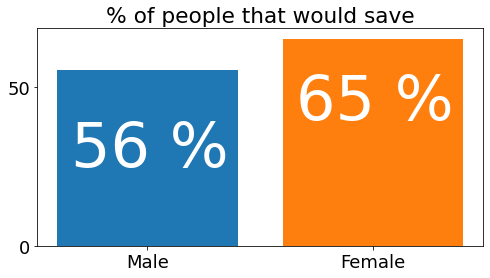

In [43]:
dff = df.copy()
dff.money.replace("Spend", False, inplace=True)
dff.money.replace("Save", True, inplace=True)
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((dff.groupby(dff.sex).money.sum() / dff.groupby(df.sex).money.count() * 100)["Male"]))
ax.bar("Female", (((dff.groupby(dff.sex).money.sum() / dff.groupby(df.sex).money.count() * 100))["Female"]))
ax.set_title("% of people that would save")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 25, "56 %")
ax.text(1-0.34, 40, "65 %")

plt.savefig("./sx_money.png")

In [44]:
dff.groupby(dff.lang).hedonism.mean()

lang
English   -3.116279
Русский    7.666667
Հայերեն   -1.095238
Name: hedonism, dtype: float64

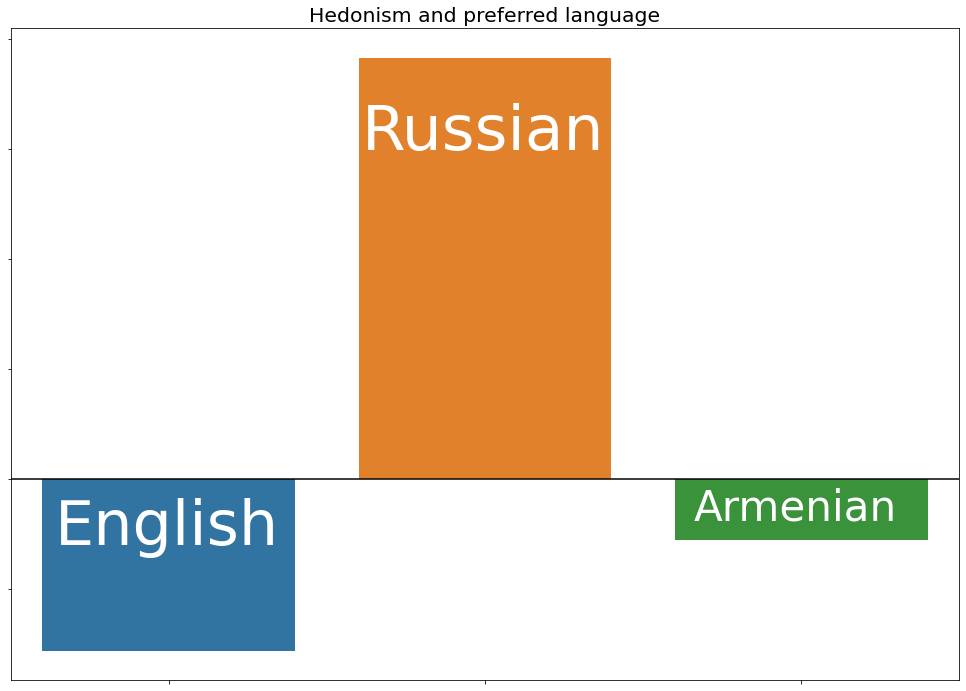

In [45]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize = (17,12))
ax = sns.barplot(x=df.groupby("lang").hedonism.mean().index, y=df.groupby("lang").hedonism.mean())
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_xlabel("")
ax.set_ylabel("")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.axhline(color="#000000")
ax.text(-0.36, -1.2, s="English")
plt.rcParams["font.size"] = 63
ax.text(0.61, 6, s="Russian")
plt.rcParams["font.size"] = 42
ax.text(1.66, -0.75, s="Armenian")
plt.rcParams["text.color"] = "#000000"
plt.rcParams["font.size"] = 17
ax.set_title("Hedonism and preferred language")
plt.savefig("./lang_hedon.png")

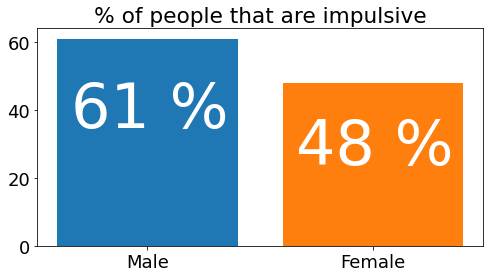

In [46]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((dff.groupby(dff.sex).impulsive.sum() / dff.groupby(df.sex).impulsive.count() * 100)["Male"]))
ax.bar("Female", (((dff.groupby(dff.sex).impulsive.sum() / dff.groupby(df.sex).impulsive.count() * 100))["Female"]))

ax.set_title("% of people that are impulsive")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 35, "61 %")
ax.text(1-0.34, 24, "48 %")
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"

plt.savefig("./sx_impulsive.png")

In [47]:
dff["conformity"] = df.premarital_partner_ok & df.premarital_partner_nok
dff.groupby(dff.sex).conformity.sum() / dff.groupby(df.sex).conformity.count() * 100

sex
Female    30.769231
Male      38.888889
Name: conformity, dtype: float64

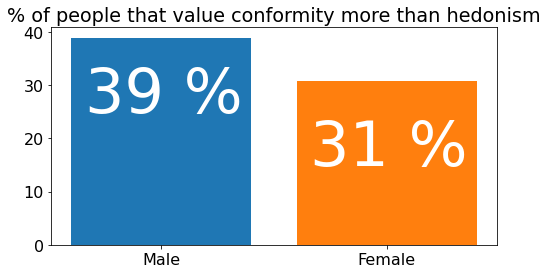

In [48]:
plt.rcParams["font.size"] = 16
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar("Male", ((dff.groupby(dff.sex).conformity.sum() / dff.groupby(df.sex).conformity.count() * 100)["Male"]))
ax.bar("Female", (((dff.groupby(dff.sex).conformity.sum() / dff.groupby(df.sex).conformity.count() * 100))["Female"]))

ax.set_title("% of people that value conformity more than hedonism")
plt.rcParams["font.size"] = 62
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.34, 25, "39 %")
ax.text(1-0.34, 15, "31 %")
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"

plt.savefig("./sx_conformity.png")

In [49]:
dff = df.copy()
dff.job.replace("Elsewhere", False, inplace=True)
dff.job.replace("Armenia", True, inplace=True)
dff.groupby(dff.sex).job.sum() / dff.groupby(df.sex).job.count() * 100

sex
Female    57.692308
Male      55.555556
Name: job, dtype: float64

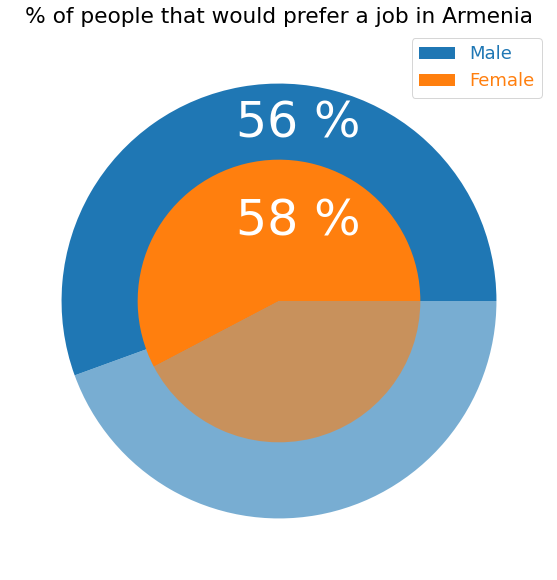

In [50]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots(figsize=(10, 10))
fig.set(facecolor = "white")
wedges, _ = ax.pie([(dff.groupby(dff.sex).job.sum() / dff.groupby(df.sex).job.count() * 100)["Male"], 100 - \
                    (dff.groupby(dff.sex).job.sum() / dff.groupby(df.sex).job.count() * 100)["Male"]], colors=["#1f77b4", "#1f77b499"])
wedges2, _ = ax.pie([(dff.groupby(dff.sex).job.sum() / dff.groupby(df.sex).job.count() * 100)["Female"], 100 - \
                     (dff.groupby(dff.sex).job.sum() / dff.groupby(df.sex).job.count() * 100)["Female"]], colors=["#ff7f0e", "#ff7f0e99"], radius=0.65)
ax.legend(handles = [wedges[0], wedges2[0]], labels=["Male","Female"], labelcolor=["#1f77b4", "#ff7f0e"])
plt.rcParams["font.size"] = 49
plt.rcParams["text.color"] = "#FFFFFF"
ax.text(-0.2, 0.75, "56 %")
ax.text(-0.2, 0.3, "58 %")
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
ax.set_title("% of people that would prefer a job in Armenia")
plt.savefig("./sx_job.png")

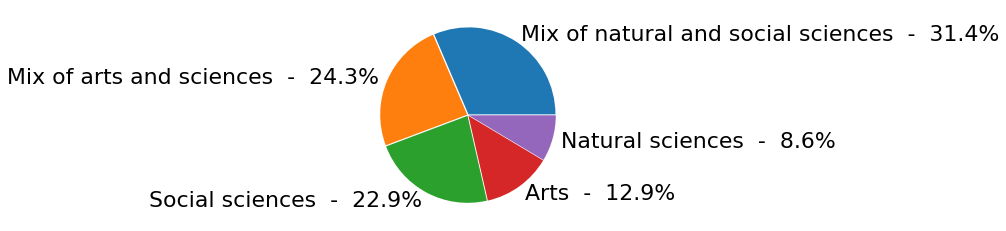

In [51]:
#fig, ax = plt.subplots(figsize=[18, 6])
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.interest.value_counts(), labels=df.interest.value_counts().keys().astype(str) + "  -  " + (df.interest.value_counts() / df.interest.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.interest.value_counts().count())
plt.savefig("./foi.png")

In [52]:
df

,lang,sex,age,interest,residence,dish,travel_s,travel_d,sex_active_s,premarital_sex,...,money,job,premarital_partner_ok,gifts,premarital_partner_nok,healthy,impulsive,looks,partner_trad,hedonism
0,English,Male,17 - 23,Mix of natural and social sciences,Large city,Ingredients,0,3,False,Okay,...,Save,Elsewhere,True,Sometimes,True,True,False,Smart,True,-21
1,English,Female,17 - 23,Mix of arts and sciences,Large city,Ingredients,1,10,False,Okay,...,Spend,Elsewhere,True,Sometimes,True,True,True,Smart,False,-2
2,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,2,10,False,Not Okay,...,Spend,Armenia,False,Very True,True,True,False,Smart,False,-11
3,English,Female,17 - 23,Social sciences,Large city,Tasty dish,2,4,False,Okay,...,Spend,Armenia,True,Sometimes,True,False,False,Beautiful,False,3
4,English,Female,17 - 23,Mix of arts and sciences,Small city,Tasty dish,0,20,False,Not Okay,...,Spend,Armenia,False,True,True,True,True,Smart,True,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,3,5,False,Not Okay,...,Save,Armenia,False,Sometimes,True,True,False,Smart,True,-25
66,English,Female,17 - 23,Arts,Large city,Ingredients,60,20,False,Okay,...,Save,Elsewhere,True,Very True,True,True,True,Smart,False,5
67,Русский,Male,17 - 23,Social sciences,Large city,Tasty dish,4,1,True,Okay,...,Save,Elsewhere,True,Very True,True,True,True,Smart,False,2
68,English,Female,17 - 23,Mix of natural and social sciences,Large city,Tasty dish,7,13,False,Okay,...,Spend,Elsewhere,True,True,True,True,True,Smart,True,1


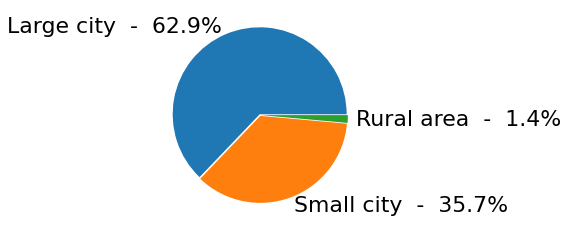

In [53]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.residence.value_counts(), labels=df.residence.value_counts().keys().astype(str) + "  -  " + (df.residence.value_counts() / df.residence.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.residence.value_counts().count())
plt.savefig("./residence.png")

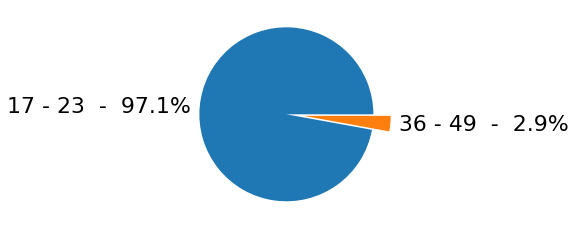

In [54]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.age.value_counts(), labels=df.age.value_counts().keys().astype(str) + "  -  " + (df.age.value_counts() / df.age.count() * 100).round(1).astype(str) + "%", explode=[0.1]*df.age.value_counts().count())
plt.savefig("./age.png")

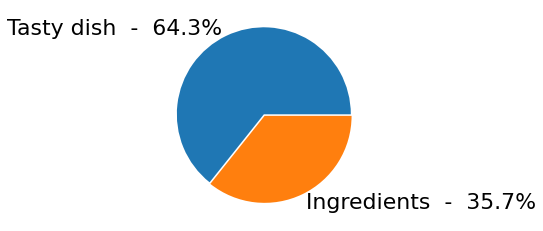

In [55]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.dish.value_counts(), labels=df.dish.value_counts().keys().astype(str) + "  -  " + (df.dish.value_counts() / df.age.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.dish.value_counts().count())
plt.savefig("./dish.png")

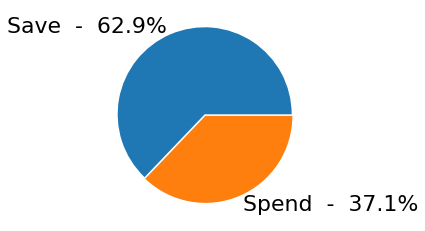

In [56]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.money.value_counts(), labels=df.money.value_counts().keys().astype(str) + "  -  " + (df.money.value_counts() / df.money.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.money.value_counts().count())
plt.savefig("./money.png")

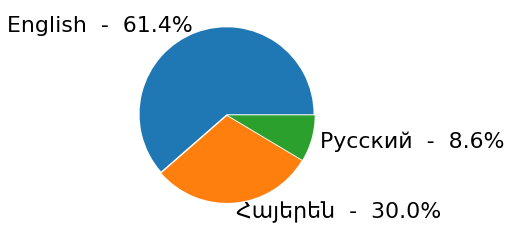

In [57]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.lang.value_counts(), labels=df.lang.value_counts().keys().astype(str) + "  -  " + (df.lang.value_counts() / df.lang.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.lang.value_counts().count())
plt.savefig("./lang.png")

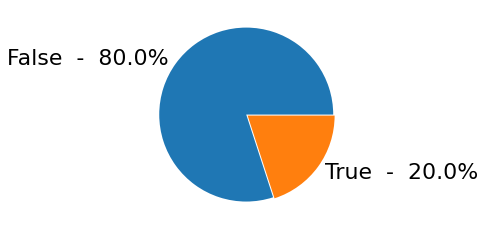

In [58]:
plt.rcParams["font.size"] = 18
plt.rcParams["text.color"] = "#000000"
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.sex_active_s.value_counts(), labels=df.sex_active_s.value_counts().keys().astype(str) + "  -  " + (df.sex_active_s.value_counts() / df.sex_active_s.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.sex_active_s.value_counts().count())
plt.savefig("./s_active.png")

In [59]:
df.columns

Index(['lang', 'sex', 'age', 'interest', 'residence', 'dish', 'travel_s',
       'travel_d', 'sex_active_s', 'premarital_sex', 'sex_active_d', 'money',
       'job', 'premarital_partner_ok', 'gifts', 'premarital_partner_nok',
       'healthy', 'impulsive', 'looks', 'partner_trad', 'hedonism'],
      dtype='object')

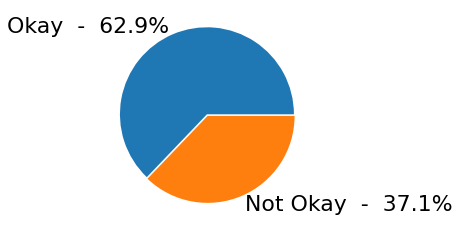

In [60]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.premarital_sex.value_counts(), labels=df.premarital_sex.value_counts().keys().astype(str) + "  -  " + \
       (df.premarital_sex.value_counts() / df.premarital_sex.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.premarital_sex.value_counts().count())
plt.savefig("./premOkay.png")

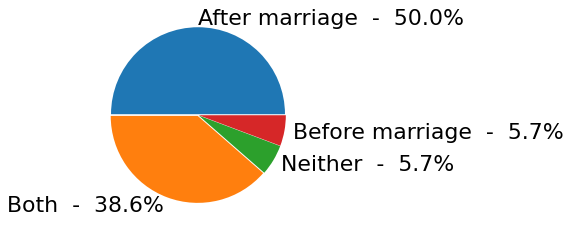

In [61]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.sex_active_d.value_counts(), labels=df.sex_active_d.value_counts().keys().astype(str) + "  -  " + \
       (df.sex_active_d.value_counts() / df.sex_active_d.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.sex_active_d.value_counts().count())
plt.savefig("./active_when.png")

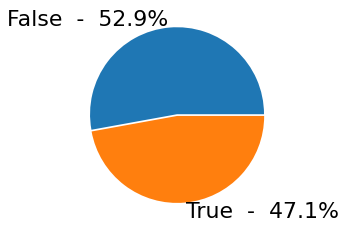

In [62]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.premarital_partner_ok.value_counts(), labels=df.premarital_partner_ok.value_counts().keys().astype(str) + "  -  " + \
       (df.premarital_partner_ok.value_counts() / df.premarital_partner_ok.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.premarital_partner_ok.value_counts().count())
plt.savefig("./ppok.png")

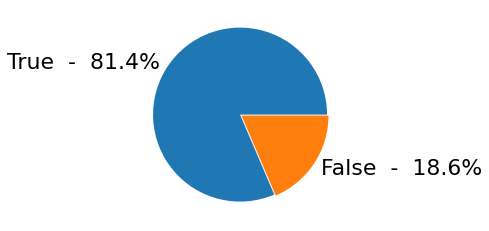

In [63]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.premarital_partner_nok.value_counts(), labels=df.premarital_partner_nok.value_counts().keys().astype(str) + "  -  " + \
       (df.premarital_partner_nok.value_counts() / df.premarital_partner_nok.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.premarital_partner_nok.value_counts().count())
plt.savefig("./ppnok.png")

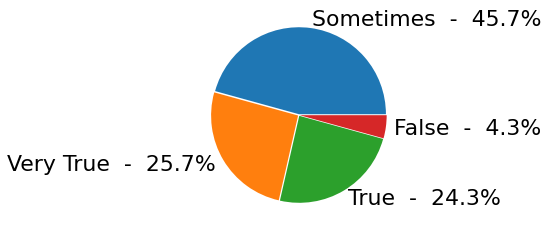

In [64]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.gifts.value_counts(), labels=df.gifts.value_counts().keys().astype(str) + "  -  " + \
       (df.gifts.value_counts() / df.gifts.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.gifts.value_counts().count())
plt.savefig("./gifts.png")

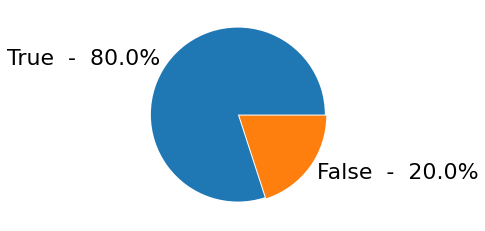

In [65]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.healthy.value_counts(), labels=df.healthy.value_counts().keys().astype(str) + "  -  " + \
       (df.healthy.value_counts() / df.healthy.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.healthy.value_counts().count())
plt.savefig("./healthy.png")

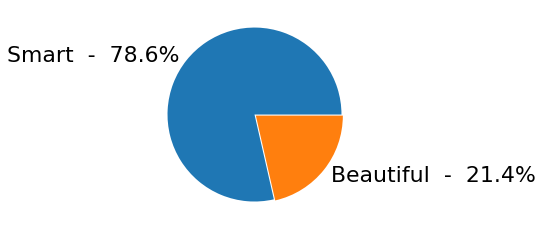

In [66]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.looks.value_counts(), labels=df.looks.value_counts().keys().astype(str) + "  -  " + \
       (df.looks.value_counts() / df.looks.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.looks.value_counts().count())
plt.savefig("./smart.png")

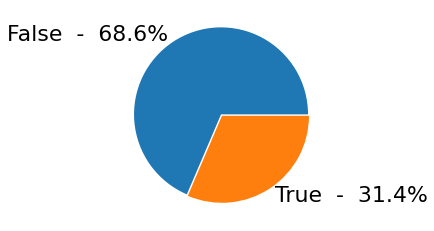

In [67]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.partner_trad.value_counts(), labels=df.partner_trad.value_counts().keys().astype(str) + "  -  " + \
       (df.partner_trad.value_counts() / df.partner_trad.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.partner_trad.value_counts().count())
plt.savefig("./ptrad.png")

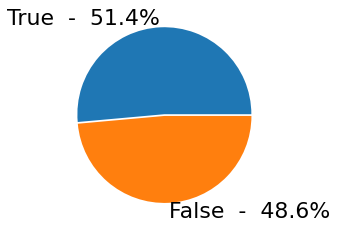

In [68]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots()
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.impulsive.value_counts(), labels=df.impulsive.value_counts().keys().astype(str) + "  -  " + \
       (df.impulsive.value_counts() / df.impulsive.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.impulsive.value_counts().count())
plt.savefig("./impulsive.png")

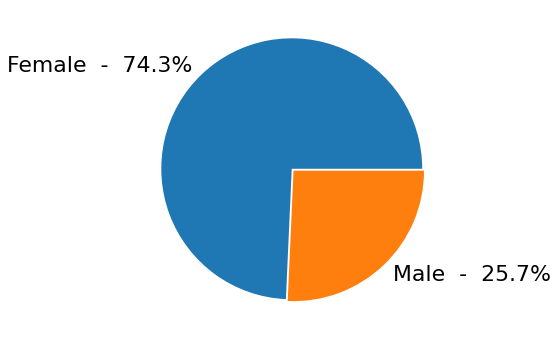

In [69]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(figsize=(16, 6))
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.sex.value_counts(), labels=df.sex.value_counts().keys().astype(str) + "  -  " + \
       (df.sex.value_counts() / df.sex.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.sex.value_counts().count())
plt.savefig("./sex.png")

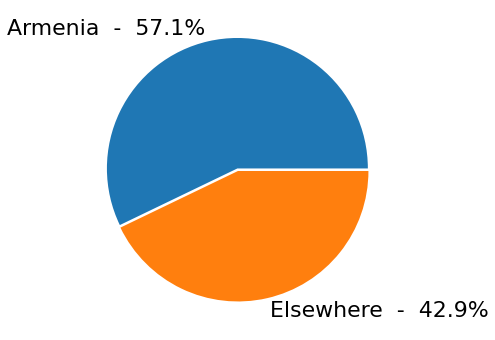

In [70]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(figsize=(16, 6))
fig.set(facecolor = "white")
plt.rcParams["font.size"] = 22
plt.rcParams["text.color"] = "#000000"
ax.pie(x = df.job.value_counts(), labels=df.job.value_counts().keys().astype(str) + "  -  " + \
       (df.job.value_counts() / df.job.count() * 100).round(1).astype(str) + "%", explode=[0.01]*df.job.value_counts().count())
plt.savefig("./job.png")